In [18]:

#1. Import libraries & data

In [19]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('InputData/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [29]:
#2. Exploratory Analysis

In [93]:
def func(row):
    if row['age'] < 21:
        return 'Children'
    elif row['age'] >21 and row['age']< 61:
        return 'Adult' 
    else:
        return 'senier citi'

df['age_group'] = df.apply(func, axis=1)

In [90]:
cols_w_diff_categories= ['sex', 'children', 'smoker', 'region']
count_of_categories= ['sex', 'region','age_group', ]
cols_w_values= ['age', 'bmi', 'charges']


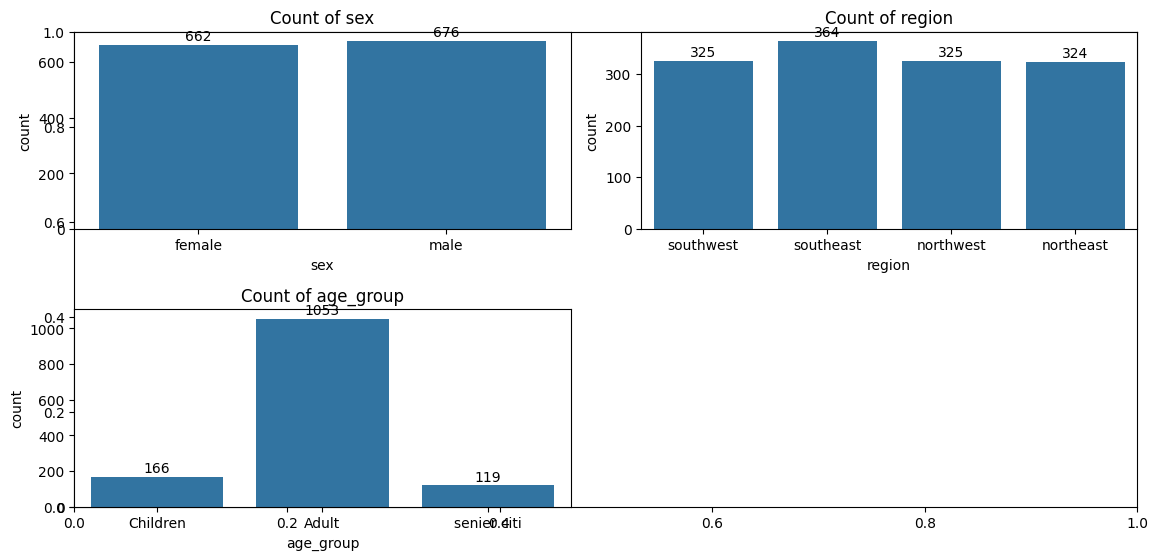

In [91]:
fig, ax = plt.subplots(figsize=(12, 6))

for i, col in enumerate(count_of_categories,1):
    
    ax = plt.subplot(2, 2, i)
    
    sns.countplot(x=df[col].astype('object'), ax=ax)
    plt.title(f'Count of {col}')
    
    for c in ax.containers:
        ax.bar_label(c, fmt='%d', padding=1)
        
    # ax.remove() 

plt.tight_layout()
plt.show()

# Explicitly close the figure to remove overlapping axes
plt.close(fig)

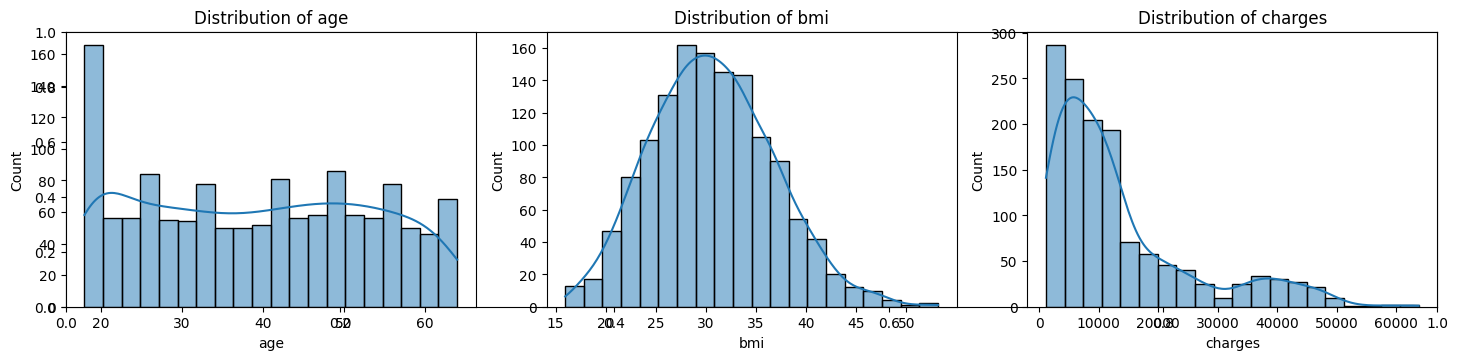

In [81]:
### number of unique elements > 6
fig, ax = plt.subplots(figsize=(15, 4))

for i, col in enumerate(cols_w_values, 1):
    plt.subplot(1, 3, i)
    sns.histplot(x=df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

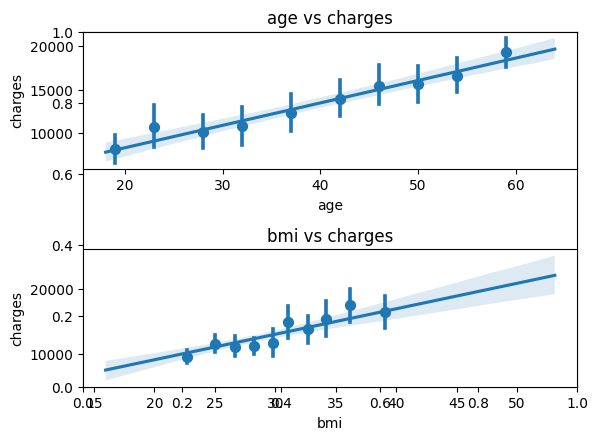

In [52]:
### number of unique elements > 6
# box plot of 'charges' & other variables
fig, ax = plt.subplots()

charges_vs_categories = [col for col in cols_w_values if col != 'charges']

for i, col in enumerate(charges_vs_categories, 1):
    plt.subplot(2, 1, i)

    ax = sns.regplot(data=df, x=df[col], y='charges', x_bins=10)
    plt.title(f'{col} vs charges')

plt.tight_layout()
plt.show()

In [50]:
### For plotting purposes, divide the data into two sets
# number of unique elements <= 6
cols_smaller_than_6 = [col for col in df.columns if df[col].nunique() <= 6]
print(cols_smaller_than_6)

# number of unique elements > 6
cols_greater_than_6 = [col for col in df.columns if df[col].nunique() > 6]
print(cols_greater_than_6)

['sex', 'children', 'smoker', 'region', 'age_group']
['age', 'bmi', 'charges']


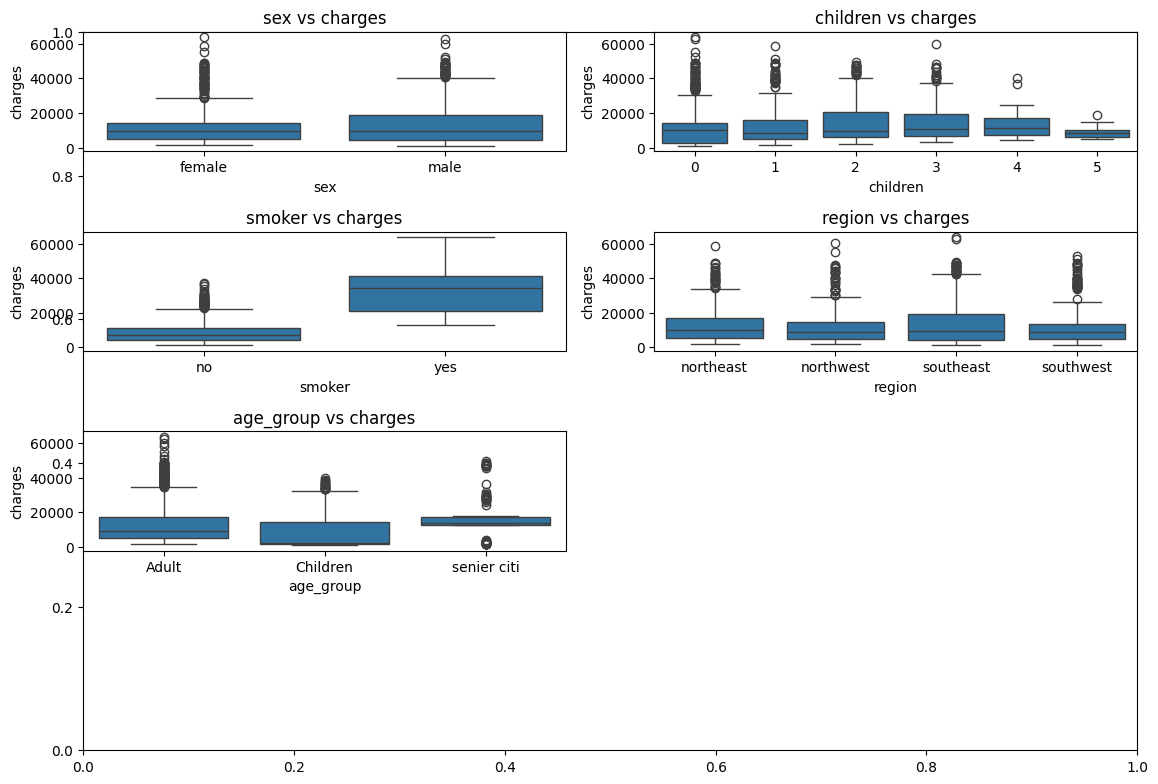

In [87]:
### number of unique elements <= 4
# box plot of 'charges' & other variables
fig, ax = plt.subplots(figsize=(12, 8))

for i, col in enumerate(cols_smaller_than_6, 1):
    plt.subplot(4, 2, i)
    
    ax = sns.boxplot(data=df, x=df[col].astype('category'), y='charges')
    plt.title(f'{col} vs charges')

plt.tight_layout()
plt.show()

In [95]:
bins_2 = [1000, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000]
labels_2 = ['1k-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k',]

df['charges_group'] = pd.cut(df.charges, bins_2, labels=labels_2, include_lowest=True)
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,charges_group
0,19,female,27.900,0,yes,southwest,16884.92400,18-29,10k-20k
1,18,male,33.770,1,no,southeast,1725.55230,18-29,1k-5k
2,28,male,33.000,3,no,southeast,4449.46200,18-29,1k-5k
3,33,male,22.705,0,no,northwest,21984.47061,30-39,20k-30k
4,32,male,28.880,0,no,northwest,3866.85520,30-39,1k-5k


In [96]:

sex_smoker_charges = df.pivot_table(index='sex', columns='smoker', values='charges')
sex_smoker_charges

smoker,no,yes
sex,,
female,8762.297300,30678.996276
male,8087.204731,33042.005975


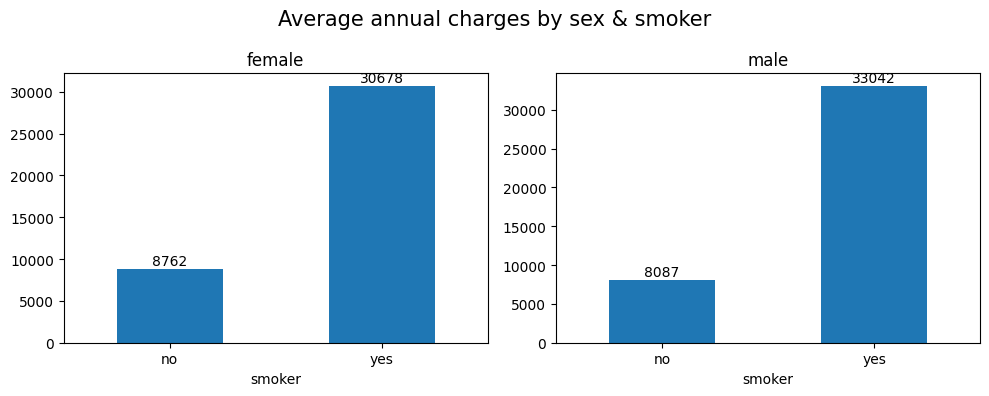

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

for ax, smoker in zip(ax, sex_smoker_charges.index):
    sex_smoker_charges.xs(smoker).plot(kind='bar', rot=0, ax=ax,)
    ax.set_title(smoker)

    for c in ax.containers:
        ax.bar_label(c, fmt='%d', padding=1)

plt.suptitle('Average annual charges by sex & smoker', fontsize=15)
plt.tight_layout()

In [119]:
sex_agegroup_smoker_charges = df.groupby(['sex', 'age_group', 'smoker']).agg(
                                charges=('charges', 'mean'))

sex_agegroup_smoker_charges.fillna(0, inplace=True)
sex_agegroup_smoker_charges.T

C:\Users\vasuv\AppData\Local\Temp\ipykernel_22920\3912302157.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_agegroup_smoker_charges = df.groupby(['sex', 'age_group', 'smoker']).agg(


sex             female                                                        \
age_group        18-29                      30-39                      40-49   
smoker              no           yes           no           yes           no   
charges    4891.600429  24861.131633  6446.766033  32009.209192  9846.976691   

sex                                                                \
age_group                       50-59                       60-69   
smoker              yes            no           yes            no   
charges    31165.864143  13393.092121  38434.868274  15674.125987   

sex                             male                                          \
age_group                      18-29                     30-39                 
smoker              yes           no          yes           no           yes   
charges    36883.434367  4035.469678  29467.67595  6828.489686  29406.165591   

sex                                                                           \
age_group        40-49                       50-59                     60-69   
smoker              no           yes            no         yes            no   
charges    9380.159067  35045.412376  12496.989245  38945.1746  15050.056492   

sex                      
age_group                
smoker              yes  
charges    41385.032655

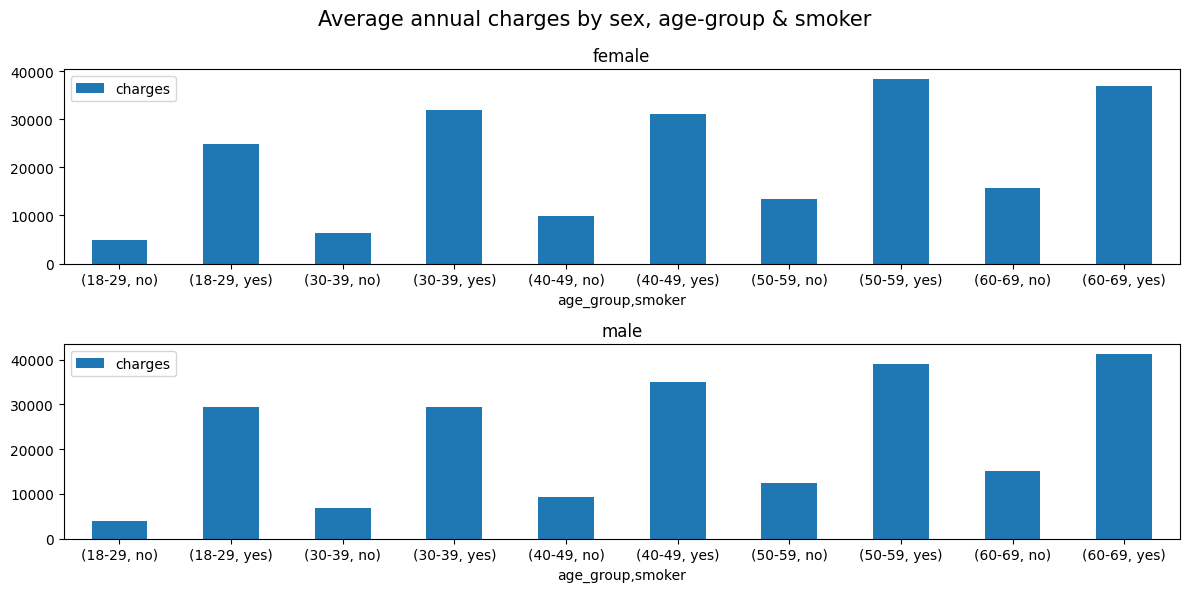

In [120]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

for ax, bmigroup in zip(ax, sex_agegroup_smoker_charges.index.levels[0]):
    sex_agegroup_smoker_charges.xs(bmigroup).plot(kind='bar', rot=0, ax=ax)
    ax.set_title(bmigroup)

plt.suptitle('Average annual charges by sex, age-group & smoker', fontsize=15)
plt.tight_layout()